In [230]:
fh = open("Dates/dates.txt", "r", encoding="UTF-8") 
x = list(fh)[0].split(",")
dates=[y[2:-1] for y in x]
print(dates[0], dates[-1])

2016-05-26 2019-11-04


In [231]:
from itertools import permutations
from collections import Counter
import os

In [232]:
for date in dates:
    path="Dates/"+date
    f = open(path, "r", encoding="UTF-8") 
print(', '.join(f)[-100:])

 | Data Protection |  Jobs | Using this website |  Copyright     © Parliamentary Copyright          


This is the text used for testing

In [233]:
sampletxt=".     Angela Smith (Penistone and Stocksbridge) (Lab)       Share       It is a pleasure to follow the hon. Member for Eastleigh (Mims Davies). I echo many of the comments about the economy made by my hon. Friends on the Front Bench, particularly in relation to productivity, with the latest figures showing the largest quarterly fall since 2008. I acknowledge that the Government have issued a challenge to areas such as mine to play their part in tackling the productivity and economic growth gap by developing devolution in the form of the northern powerhouse. I for one accept that challenge. I accept that Sheffield city region has to raise its game. We have to play our part and believe in ourselves, which we have not done for a very long time. Quite simply—as one employer said to me today in an email—we must believe that we have the skills, knowledge and ability to surpass London and become a generator of great wealth again. However, the Government must play their part too, and at the moment they are not doing so. The announcement today about the Department for Business, Innovation and Skills and the relocation of staff from Sheffield to London belies everything that the Government have said on this point, but they can remedy the situation. I will be watching carefully the development of the infrastructure plan. In particular, I will be looking for confirmation that the new trans-Pennine links between Manchester and Sheffield will be given the green light, as they are essential to the future of the northern economy. I will keep up the pressure on the Government to support a positive outcome to the steel crisis. Funnily enough, the crisis in South Yorkshire has triggered a revival in the faith and the confidence that we used to have in ourselves and in our engineering prowess. My plea to the Government today is: please do not let us down. We believe that we are the best steel producers in the world. If the Government believe in us, we will deliver. Let me turn now to the biggest threat facing the economy in the next few years—the instability that is currently characterising our political system. Let us be clear about this: in the UK, politics is polarising. We know that it is happening on the Labour Benches, as we have shifted to the left. On the Government Benches, Brexit is tearing the Conservative party apart, and the centre ground is disappearing before our very eyes. What on earth happened to the politics of the art of the possible? This movement is happening globally. In some countries, the polarisation is even greater. One has to look only at Austria last week and at Holland, where the three mainstream parties are set to secure, in total, just 40% in the elections next year. As we have seen, even the US is not immune from the phenomenon. Globalisation is one of the main causes of the situation. I echo the words of Mr Blair who said today that the problem of the centre ground was that it looks “as if we are managers of the status quo and not changers of it”. It is a worrying trend, and polarisation of the political sphere is creating a vacuum that could visit lasting damage on the social and economic fabric of this country. We bear a responsibility to resurrect the relevance of pragmatic politics. We need to demonstrate that centre-ground politics can deliver a progressive, prosperous and secure future for the people of this country. If we do not do that, the future of this country and its economy is very much in danger.     Share           2.43 pm        The edit just "

In [234]:
sampletxt[:300]

'.     Angela Smith (Penistone and Stocksbridge) (Lab)       Share       It is a pleasure to follow the hon. Member for Eastleigh (Mims Davies). I echo many of the comments about the economy made by my hon. Friends on the Front Bench, particularly in relation to productivity, with the latest figures '

This is a function to save all sentences of a file in a list

In [235]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
s=set(stopwords.words('english'))

#added missing stopwords
extrastopwords=["would", "could", "us", "share"]
for w in extrastopwords:
    s.add(w)

print(len(s))

183


In [236]:
def savesent(text):
    #input: text
    #output: list of sentences of filtered text
    lst = []
    #creating list with all words by seperation by spaces. except for words that are "" and stopwords
    lot = [i for i in list(text.split(" ")) if i != ""]
    lot = [i for i in lot if i.lower() not in s]
    #starting the sentence
    sent=""
    for i in lot:
        i=nltk.WordNetLemmatizer().lemmatize(i.lower())
        #all indicate an end to a sentence so all words that are not an end of sentence (eos)
        if i[-1] not in (".", "!", "?"):
            if i[-1]in (",", "-", "—"):
                i=nltk.WordNetLemmatizer().lemmatize(i[:-1])
            sent+=i #adds the word without the eos indication
            sent+=" "
        #else it is an end of sentence and the sentence get appended to the lst of sentences
        else:
            sent+=nltk.WordNetLemmatizer().lemmatize(i[:-1])
            lst.append(sent)
            sent=""
    #returns list of sentences
    return lst
    

In [237]:
f = open("Dates/2016-05-26", "r", encoding="UTF-8") 
file=', '.join(f)
sentences = savesent(file)

In [238]:
sentences[200:210]

['six year chancellor one blame himself',
 'queen’s speech furnished plenty unreal promise',
 'government say “will support aspiration promote home ownership”',
 'tell hundred thousand young people serious chance ever owning home own',
 'home ownership fallen lowest level decade chancellor’s watch',
 'rough sleeping risen london 30% past year biggest rise since current reporting procedure introduced',
 'nearly 70,000 family living temporary accommodation including bed breakfast accommodation',
 'nine 10 under-35s modest income frozen home ownership 2025 according independent analysis',
 'edit sent saved',
 'following error returned: content already edited awaiting review']

In [239]:
savesent("what? yes! hello Prime minister. hoping walked yes cats cats.") 

['what', 'yes', 'hello prime minister', 'hoping walked yes cat cat']

This counts all cooccurances of our top 5 brexit words per file

In [240]:
#words we want to focus on
words = ["brexit", "anpr", "cta", "eea", "schengen"]

spansize = 5

cooccsw1 = Counter()
cooccsw2 = Counter()
cooccsw3 = Counter()
cooccsw4 = Counter()
cooccsw5 = Counter()

def allcooccs(text, date=True):
    sentences = savesent(text)
    for sentence in sentences:
        lowords = sentence.split(" ")
        for i in range(0, len(lowords)):
            w=lowords[i].lower()
            if w in (" ","%", "`","~","…", '£', "”", '×', '—', 'ç', '“', '’', '/', '©', "\n", "[", "]", '|', '‘'):
                continue
            for x in  (".", "!", "?"):
                if x in w:
                    j=w.find(x)
                    l=len(w)
                    w=w[:j-l]
                    
            if w in words:
                span_range = list(range(max(i-spansize, 0), i))
                
                span_range.extend(range(i+1, min(i + spansize + 1, len(lowords))))
                
                try:
                    for cw in [lowords[idx] for idx in span_range if len(lowords[idx])>2]:
                        if w == words[0]:
                            cooccsw1[(w, cw)] += 1
                        if w == words[1]:
                            cooccsw2[(w, cw)] += 1
                        if w == words[2]:
                            cooccsw3[(w, cw)] += 1
                        if w == words[3]:
                            cooccsw4[(w, cw)] += 1
                        if w == words[4]:
                            cooccsw5[(w, cw)] += 1
                except IndexError:
                    print("word", w, "span", span_range, date)
                    
    return cooccsw1,cooccsw2,cooccsw3,cooccsw4,cooccsw5

In [242]:
#counting coocurances for all files for all centre words
for date in dates:
    path="Dates/"+date
    f = open(path, "r", encoding="UTF-8") 
    file = (', '.join(f))
    allcooccs(file, date)

In [243]:
cooccsw1.most_common(10)
cooccsw2.most_common(10)
cooccsw3.most_common(10)
cooccsw4.most_common(10)
cooccsw5.most_common(10)

[(('schengen', 'information'), 205),
 (('schengen', 'system'), 184),
 (('schengen', 'area'), 101),
 (('schengen', 'european'), 94),
 (('schengen', 'member'), 48),
 (('schengen', 'criminal'), 40),
 (('schengen', 'border'), 37),
 (('schengen', 'access'), 35),
 (('schengen', 'database'), 32),
 (('schengen', 'part'), 28)]

In [244]:
#puts the top 10 cooccuring words as values to the centre words
d={}

d[words[0]]=[x[0][1] for x in cooccsw1.most_common(10)]
d[words[1]]=[x[0][1] for x in cooccsw2.most_common(10)]
d[words[2]]=[x[0][1] for x in cooccsw3.most_common(10)]
d[words[3]]=[x[0][1] for x in cooccsw4.most_common(10)]
d[words[4]]=[x[0][1] for x in cooccsw5.most_common(10)]

print(d)

{'brexit': ['no-deal', 'deal', 'government', 'brexit', 'people', 'minister', 'vote', 'secretary', 'want', 'country'], 'anpr': ['system', 'use', 'data', 'police', 'car', 'park', 'law', 'enforcement', 'member', 'caught'], 'cta': ['section', '2010', '2009', 'part', 'insert', 'subsection', 'accordance', 'profit', '(b)', 'company'], 'eea': ['national', 'swiss', 'agreement', 'member', 'state', 'country', 'eea', 'firm', 'right', 'membership'], 'schengen': ['information', 'system', 'area', 'european', 'member', 'criminal', 'border', 'access', 'database', 'part']}


In [245]:
print(words[0], d[words[0]][0])
print(cooccsw1[(words[0], d[words[0]][0])])
"no-deal" in d["brexit"]

brexit no-deal
5283


True

In [246]:
lstw1=[cooccsw1[(words[0], x)] for x in d[words[0]]]
lstw2=[cooccsw2[(words[1], x)] for x in d[words[1]]]
lstw3=[cooccsw3[(words[2], x)] for x in d[words[2]]]
lstw4=[cooccsw4[(words[3], x)] for x in d[words[3]]]
lstw5=[cooccsw5[(words[4], x)] for x in d[words[4]]]

In [247]:
print(lstw1)

[5283, 4991, 4313, 3322, 3090, 3030, 2493, 2422, 2228, 2142]


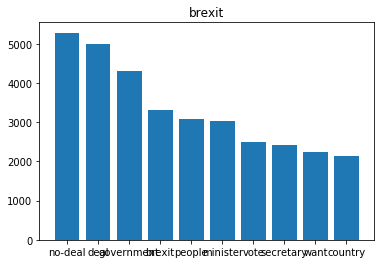

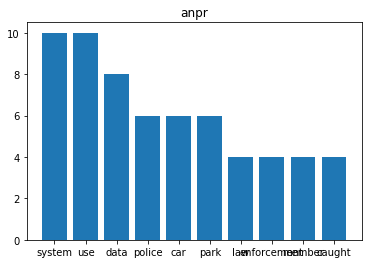

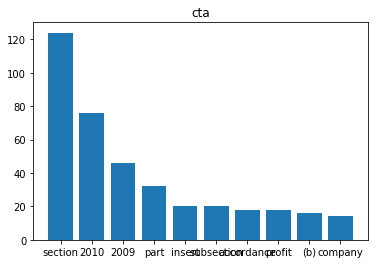

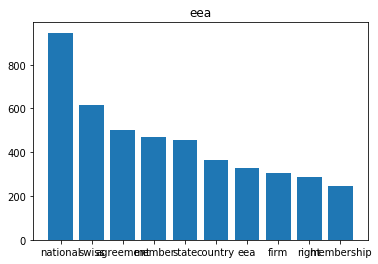

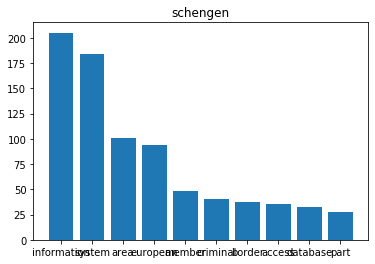

In [248]:
import matplotlib.pyplot as plt

v1 = lstw1#list values
k1 = d[words[0]]#list keys

v2 = lstw2#list values
k2 = d[words[1]]#list keys

v3 = lstw3#list values
k3 = d[words[2]]#list keys

v4 = lstw4#list values
k4 = d[words[3]]#list keys

v5 = lstw5#list values
k5 = d[words[4]]#list keys
        
plt.bar(k1, v1)
plt.title(words[0])
plt.show()

plt.bar(k2, v2)
plt.title(words[1])
plt.show()

plt.bar(k3, v3)
plt.title(words[2])
plt.show()

plt.bar(k4, v4)
plt.title(words[3])
plt.show()

plt.bar(k5, v5)
plt.title(words[4])
plt.show()



Now we plot co-occurances over time

In [249]:
def lstofmonths(start, finish):
    lst=[start]
    i=start
    while i != finish:
        if i[1]==12:
            i=[i[0]+1, 1]
        else:
            i=[i[0], i[1]+1]
        lst.append(i)
    return lst
    

In [250]:
#a list of the months and years
months=lstofmonths([2016, 5],[2019, 11])
print(months)

[[2016, 5], [2016, 6], [2016, 7], [2016, 8], [2016, 9], [2016, 10], [2016, 11], [2016, 12], [2017, 1], [2017, 2], [2017, 3], [2017, 4], [2017, 5], [2017, 6], [2017, 7], [2017, 8], [2017, 9], [2017, 10], [2017, 11], [2017, 12], [2018, 1], [2018, 2], [2018, 3], [2018, 4], [2018, 5], [2018, 6], [2018, 7], [2018, 8], [2018, 9], [2018, 10], [2018, 11], [2018, 12], [2019, 1], [2019, 2], [2019, 3], [2019, 4], [2019, 5], [2019, 6], [2019, 7], [2019, 8], [2019, 9], [2019, 10], [2019, 11]]


In [251]:
#check to see when elem in months and filename are the same
x = [int(i) for i in "2016-05-26".split("-")[:-1]]
print(x, months[0])
print(x==months[0])

[2016, 5] [2016, 5]
True


In [252]:
def cooccsv1(filetxt, words, d):
    
    #input: text, list of centrewords, dict with centre words as keys and list of top co-occuring words as value
    #output: count of combination of centre word and co-occuring word
    
    sentences = savesent(filetxt)
    for sentence in sentences:
        lowords = sentence.split(" ")
        for i in range(0, len(lowords)):
            w=lowords[i].lower()
            for x in  (".", "!", "?"):
                if x in w:
                    j=w.find(x)
                    l=len(w)
                    w=w[:j-l]
                    
            if w in words:
                span_range = list(range(max(i-spansize, 0), i))
                
                span_range.extend(range(i+1, min(i + spansize + 1, len(lowords))))
                
                for cw in [lowords[idx] for idx in span_range]:
                    if cw in d[w]:
                        cooccswm[(w, cw)] += 1
    

In [253]:

loallcooccs=[[[],[],[],[],[],[],[],[],[],[]],[[],[],[],[],[],[],[],[],[],[]],
             [[],[],[],[],[],[],[],[],[],[]],[[],[],[],[],[],[],[],[],[],[]],
             [[],[],[],[],[],[],[],[],[],[]]]


for m in months:
    #new counter each month
    cooccswm = Counter()
    #all possible dates of files
    for date in dates:
        
        name = [int(i) for i in date.split("-")[:-1]]
        if m == name:
            
            path="Dates/"+date
            f = open(path, "r", encoding="UTF-8") 
            filetxt = (', '.join(f))
            cooccsv1(filetxt, words, d)
            
    for ww in range(0, 5):
        word=words[ww]
        for cww in range(0,10):
            coword=d[word][cww]
            value=cooccswm[(word, coword)]
            loallcooccs[ww][cww].append(value)
            
print(loallcooccs)

[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 74, 60, 10, 4, 38, 12, 4, 8, 22, 38, 0, 14, 126, 163, 314, 676, 738, 628, 193, 154, 400, 343, 0, 742, 512, 2], [0, 6, 24, 0, 30, 42, 28, 26, 69, 67, 69, 50, 0, 64, 96, 0, 24, 74, 125, 114, 58, 42, 75, 27, 46, 130, 170, 0, 120, 241, 277, 539, 637, 314, 486, 166, 81, 60, 81, 0, 147, 386, 0], [1, 18, 62, 0, 54, 132, 98, 121, 94, 91, 139, 84, 0, 84, 60, 0, 64, 98, 226, 142, 92, 84, 147, 36, 79, 136, 185, 0, 56, 113, 151, 202, 301, 198, 223, 110, 119, 98, 53, 0, 127, 232, 2], [0, 12, 64, 0, 88, 130, 88, 138, 104, 58, 48, 16, 0, 12, 8, 0, 44, 36, 92, 104, 44, 86, 64, 20, 28, 116, 140, 0, 12, 70, 88, 196, 346, 176, 224, 124, 56, 64, 60, 0, 132, 234, 0], [0, 28, 53, 0, 48, 78, 40, 45, 56, 68, 58, 16, 0, 34, 58, 0, 46, 24, 86, 77, 48, 30, 76, 31, 28, 44, 112, 0, 38, 59, 135, 204, 318, 147, 302, 94, 74, 60, 68, 0, 166, 241, 0], [0, 26, 96, 0, 40, 109, 60, 52, 88, 80, 74, 66, 0, 46, 50, 0, 42, 56, 68, 120, 66, 36, 64, 4, 43, 78, 114, 0, 29, 76

In [256]:
#test
len(loallcooccs[0][0])
cooccsw1(("brexit", "no-deal"))
sum(loallcooccs[0][0])

TypeError: 'Counter' object is not callable

In [257]:
print(w0cw0)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 74, 60, 10, 4, 38, 12, 4, 8, 22, 38, 0, 14, 126, 163, 310, 672, 738, 628, 193, 154, 398, 343, 0, 738, 512, 2]


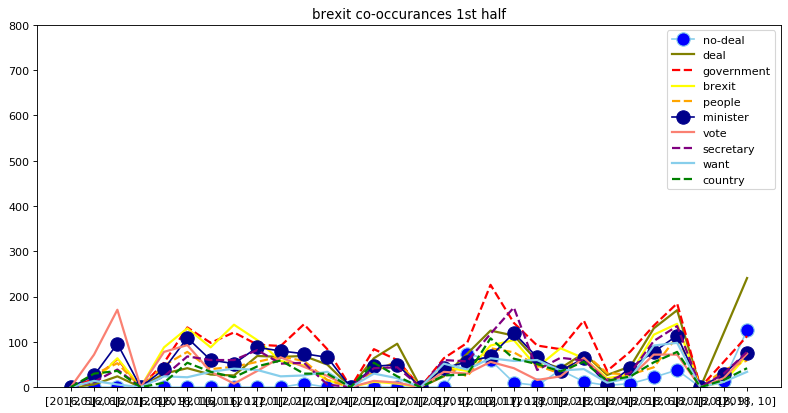

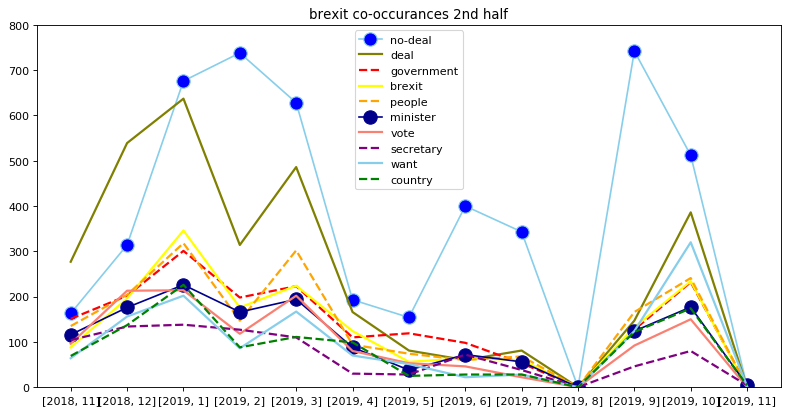

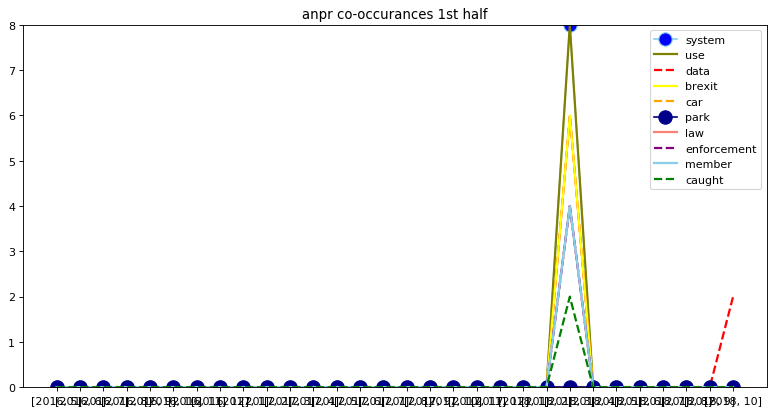

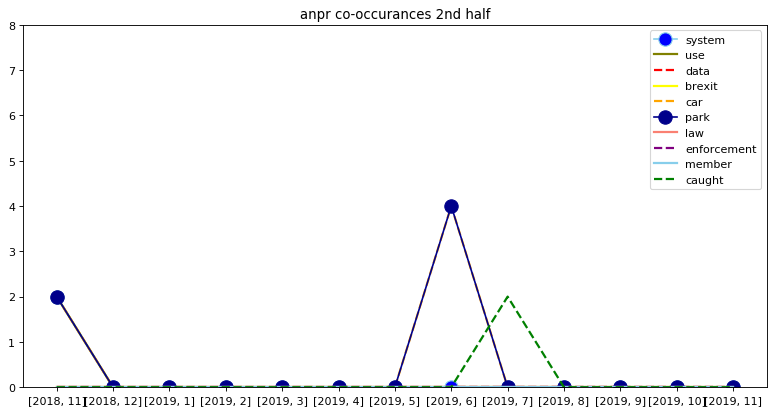

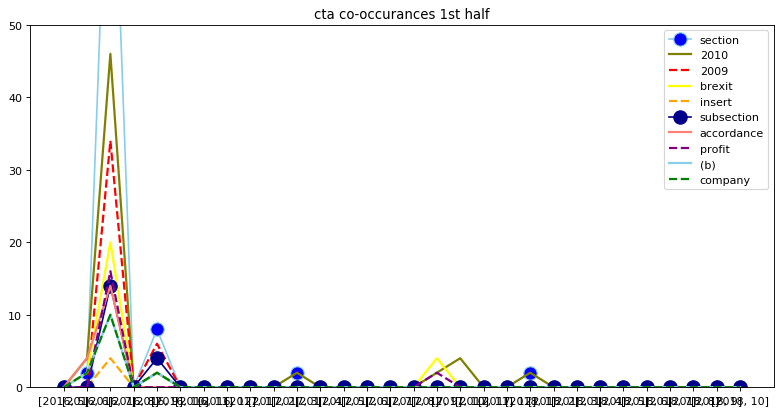

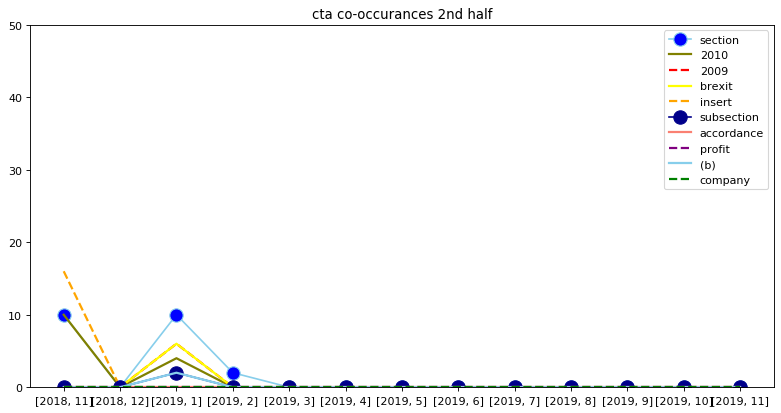

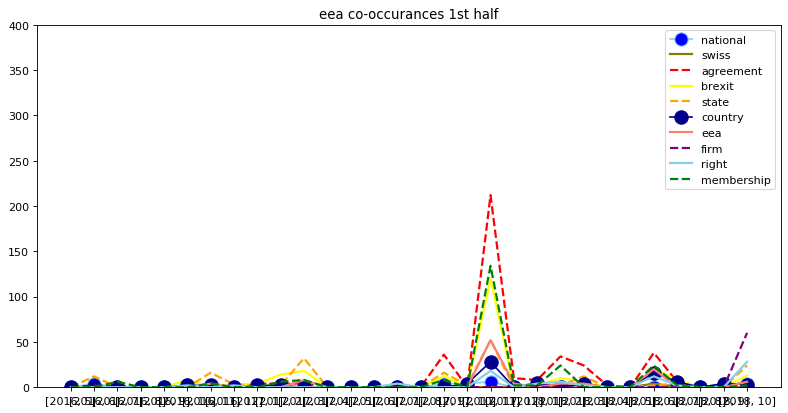

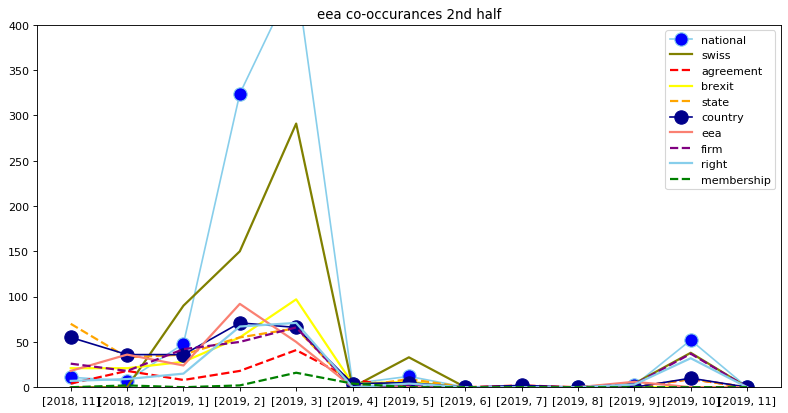

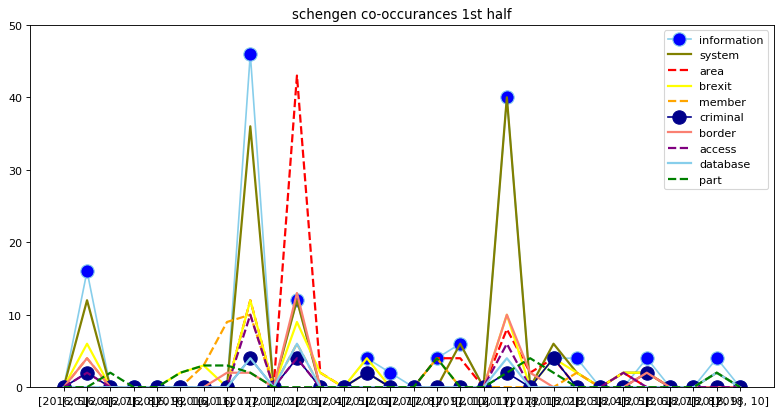

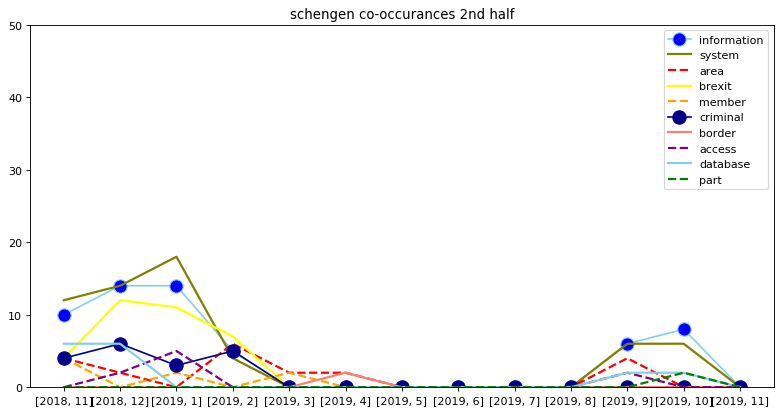

In [258]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-6, 6, 1024)
ranges=[800, 8, 50, 400, 50]

months1h=[str(x) for x in months[:30]]
months2h=[str(x) for x in months[30:]]

for i in range(0, 5):
    figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

    plt.plot(months1h, loallcooccs[i][0][:30], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', label=d[words[i]][0])
    plt.plot(months1h, loallcooccs[i][1][:30], marker='', color='olive', linewidth=2, label=d[words[i]][1])
    plt.plot(months1h, loallcooccs[i][2][:30], marker='', color='red', linewidth=2, linestyle='dashed', label=d[words[i]][2])
    plt.plot(months1h, loallcooccs[i][3][:30], marker='', color='yellow', linewidth=2, label=d[words[0]][3])
    plt.plot(months1h, loallcooccs[i][4][:30], marker='', color='orange', linewidth=2, linestyle='dashed', label=d[words[i]][4])
    plt.plot(months1h, loallcooccs[i][5][:30], marker='o', markerfacecolor='darkblue', markersize=12, color='darkblue', label=d[words[i]][5])
    plt.plot(months1h, loallcooccs[i][6][:30], marker='', color='salmon', linewidth=2, label=d[words[i]][6])
    plt.plot(months1h, loallcooccs[i][7][:30], marker='', color='purple', linewidth=2, linestyle='dashed', label=d[words[i]][7])
    plt.plot(months1h, loallcooccs[i][8][:30], marker='', color='skyblue', linewidth=2, label=d[words[i]][8])
    plt.plot(months1h, loallcooccs[i][9][:30], marker='', color='green', linewidth=2, linestyle='dashed', label=d[words[i]][9])


    plt.ylim(0, ranges[i])
    plt.legend()
    plt.title(words[i]+" co-occurances 1st half")
    plt.show()


    figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

    months1h=[str(x) for x in months[:30]]
    months2h=[str(x) for x in months[30:]]

    plt.plot(months2h, loallcooccs[i][0][30:], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', label=d[words[i]][0])
    plt.plot(months2h, loallcooccs[i][1][30:], marker='', color='olive', linewidth=2, label=d[words[i]][1])
    plt.plot(months2h, loallcooccs[i][2][30:], marker='', color='red', linewidth=2, linestyle='dashed', label=d[words[i]][2])
    plt.plot(months2h, loallcooccs[i][3][30:], marker='', color='yellow', linewidth=2, label=d[words[0]][3])
    plt.plot(months2h, loallcooccs[i][4][30:], marker='', color='orange', linewidth=2, linestyle='dashed', label=d[words[i]][4])
    plt.plot(months2h, loallcooccs[i][5][30:], marker='o', markerfacecolor='darkblue', markersize=12, color='darkblue', label=d[words[i]][5])
    plt.plot(months2h, loallcooccs[i][6][30:], marker='', color='salmon', linewidth=2, label=d[words[i]][6])
    plt.plot(months2h, loallcooccs[i][7][30:], marker='', color='purple', linewidth=2, linestyle='dashed', label=d[words[i]][7])
    plt.plot(months2h, loallcooccs[i][8][30:], marker='', color='skyblue', linewidth=2, label=d[words[i]][8])
    plt.plot(months2h, loallcooccs[i][9][30:], marker='', color='green', linewidth=2, linestyle='dashed', label=d[words[i]][9])

    plt.ylim(0, ranges[i])
    plt.legend()
    plt.title(words[i]+" co-occurances 2nd half")
    plt.show()


Sentiment analysis

In [ ]:
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn

In [ ]:

word=list(swn.senti_synsets('luckily'))[0]
word.pos_score()


In [161]:
un2wn_mapping = {"VERB" : wn.VERB, "NOUN" : wn.NOUN, "ADJ" : wn.ADJ, "ADV" : wn.ADV}

In [193]:
def sentitext(text, pos, neg, obj):
    #input: text and previous pos neg obj values
    #output: new pos neg obj values based on the sentiments in all sentences
    lst=savesent(text)
    lstw=[]
    print("savesent")
    for s in lst:
        s = [w for w in s.split(" ") if w.isalpha()]
        for w, p in nltk.pos_tag(s, tagset="universal"):
            if len(w)>2:
                if p in un2wn_mapping:
                       lstw.append(w)
    
    print("pos-tagging")
    
    for w in lstw:
        try:
            word=list(swn.senti_synsets(w))[0]
            pos+=word.pos_score()
            neg+=word.neg_score()
            obj+=word.obj_score()
        except:
            continue
        
        
    return pos, neg, obj   

In [194]:
loallsenti=[[],[],[]]


for m in months:
    #to check how far the computation is
    print(m)
    #new counter each month
    #all possible dates of files
    pos=0
    neg=0
    obj=0
    
    for date in dates:
        
        name = [int(i) for i in date.split("-")[:-1]]
        if m == name:
            
            path="Dates/"+date
            f = open(path, "r", encoding="UTF-8") 
            filetxt = (', '.join(f))
            pos, neg, obj = sentitext(filetxt, pos, neg, obj)
            
    lstsenti =[pos, neg, obj]       
    for i in range(0, 3):  
        loallsenti[i].append(lstsenti[i])
            
    print(loallsenti)

[2016, 5]
savesent
pos-tagging
[[1207.528], [861.972], [17172.5]]
[2016, 6]
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
[[1207.528, 86470.19500000002], [861.972, 56858.55499999986], [17172.5, 1228827.25]]
[2016, 7]
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
savesent
pos-tagging
[[1207.528, 86470.19500000002, 93388.35699999999], [861.972, 56858.55499999986, 60903.392999999895], [17172.5, 1228827.25, 1334871.25]]
[2016, 8]
[[1207.528, 86470.19500000002, 93388.35699999999, 0], [861.972, 56858.55499999986, 60903.392999999895, 0], [17172.5, 1228827.25, 1334871.25, 0]]
[2016, 9]
savesent
pos-tagging
sav

In [202]:
loallsenti=[[1207.528, 86470.19500000002, 93388.35699999999, 0, 70291.39300000011, 135537.99600000025, 142495.733, 96243.91000000003, 123605.273, 118817.64699999998, 150036.21200000035, 43347.26100000005, 0, 31694.868000000017, 85474.28000000007, 0, 53293.59800000006, 112331.681, 144889.9880000002, 104891.03199999993, 138800.37599999981, 104667.65699999995, 155335.56600000025, 74890.50600000002, 114910.73999999982, 138169.52400000018, 125643.92099999973, 0, 60627.95000000003, 121282.17699999998, 131979.13799999995, 109736.90300000003, 142345.09300000023, 147877.5080000002, 157904.3740000003, 93789.90799999995, 99167.277, 106594.39199999989, 121858.32599999984, 0, 45636.97300000006, 130353.65700000002, 7391.101999999997], [861.972, 56858.55499999986, 60903.392999999895, 0, 44997.98199999991, 88431.5039999999, 92923.2669999999, 64845.21499999984, 79013.1019999999, 78753.9779999999, 98958.66299999999, 28948.738999999958, 0, 20596.75699999999, 56584.09499999993, 0, 36336.02699999993, 76992.5689999999, 97806.51199999996, 70034.09299999989, 91517.49900000008, 70333.71799999998, 103877.55900000005, 50649.743999999904, 76595.01000000005, 94173.85099999982, 82655.57900000003, 0, 42167.92499999997, 80019.57299999984, 87595.86199999988, 76457.5969999999, 97885.53199999992, 98767.99200000001, 107166.37600000008, 65622.71699999989, 67138.97299999994, 70703.10799999998, 80933.799, 0, 32236.276999999955, 87783.84299999986, 4813.522999999999], [17172.5, 1228827.25, 1334871.25, 0, 977269.625, 1898890.5, 1981774.0, 1375369.875, 1736374.625, 1693286.375, 2131973.125, 630317.0, 0, 433832.375, 1207347.625, 0, 774949.375, 1584768.75, 2049456.5, 1502624.875, 1966292.125, 1492854.625, 2217527.875, 1055740.75, 1626102.25, 1972121.625, 1783714.5, 0, 878875.125, 1675922.25, 1877122.0, 1609959.5, 2049701.375, 2124102.5, 2267329.25, 1338140.375, 1370908.75, 1505431.5, 1670206.875, 0, 658127.75, 1815786.5, 103428.375]]

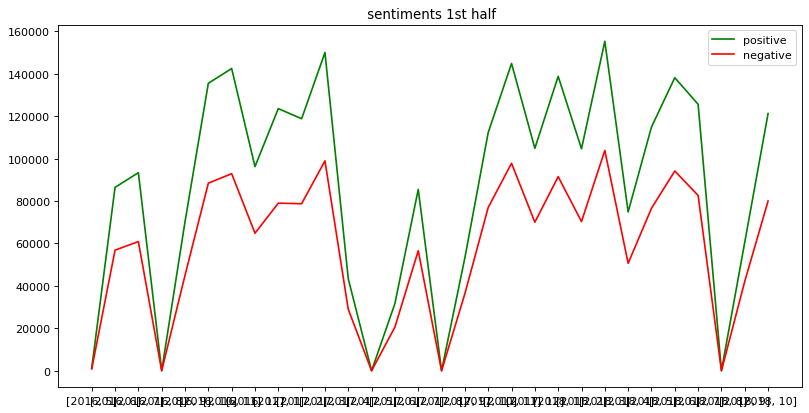

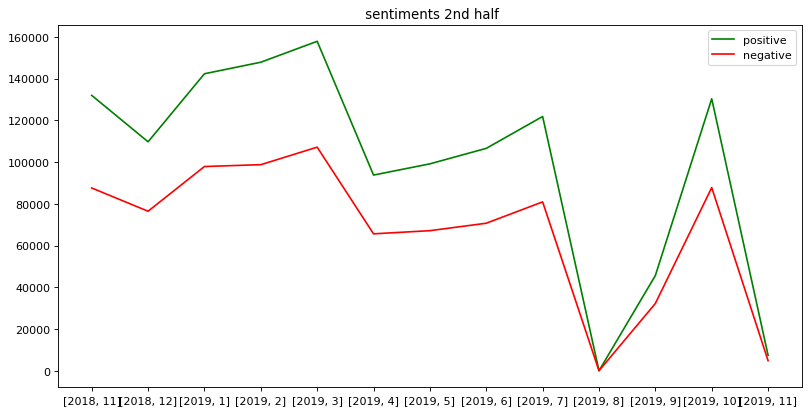

In [203]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-6, 6, 1024)
#ranges=[800, 8, 50, 400, 50]

months1h=[str(x) for x in months[:30]]
months2h=[str(x) for x in months[30:]]

figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(months1h, loallsenti[0][:30], color='green', label="positive")
plt.plot(months1h, loallsenti[1][:30], color='red', label="negative")


#plt.ylim(0, ranges[i])
plt.legend()
plt.title(" sentiments 1st half")
plt.show()


figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(months2h, loallsenti[0][30:], color="green", label="positive")
plt.plot(months2h, loallsenti[1][30:], color='red', label="negative")
   
plt.legend()
plt.title(" sentiments 2nd half")
plt.show()
